# Testing ⏭ GreedLR Scheduler for 🤗 Transformers

## 1. Translation

### Need to reinstall from source to register changes

(may need to restart kernel)

In [10]:
%pip install -r translation/requirements.txt
%pip install -e ~/transformers/ #Or wherever you downloaded this source 


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Obtaining file:///root/transformers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for transformers (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.27.0.dev1-0.editable-py3-none-any.whl size=34577 sha256=aa1db6ae56fb148650c6fcbb8b85949dff916a7675b4aac7e0276ba561eaeb2d
  Stored in directory: /root/transformers/examples/pytorch/pip-ephem-wheel-cache-aeb8ueft/wheels/c6/d4/24/fe65e904e9dddeaa02668d56c7a9bd848371752e768d6bb33b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.0.dev1
    Uninstalling transformers-4.27.0.dev1:
      Succ

In [2]:
from translation import run_translation
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# %pip install sacremoses

### Default AdamW_HF with LambdaLR (linear, default)

In [5]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_translation.py
    --model_name_or_path facebook/mbart-large-50-many-to-many-mmt
    --source_lang de
    --target_lang en
    --dataset_name wmt16
    --dataset_config_name de-en
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=10000
    --warmup_steps=1000
    --do_train
    --learning_rate=1e-2
    --per_device_train_batch_size=4
    --per_device_eval_batch_size=4
    --predict_with_generate
    --optim adafactor
    --lr_scheduler_type cosine_with_restarts
    --save_strategy no
    --logging_steps 100
""".split()

with patch.object(sys, "argv", testargs):
    run_translation.main()
    result = get_results(tmp_dir)
    # print(result["eval_bleu"]>30)


03/15/2023 16:08:05 - WARNING - translation.run_translation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/15/2023 16:08:05 - INFO - translation.run_translation - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.99,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wr

100%|██████████| 3/3 [00:00<00:00, 62.22it/s]
[INFO|configuration_utils.py:668] 2023-03-15 16:08:05,833 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--mbart-large-50-many-to-many-mmt/snapshots/e2cfb9f4d0cfb8879734094041a08c37397b3177/config.json
[INFO|configuration_utils.py:720] 2023-03-15 16:08:05,850 >> Model config MBartConfig {
  "_name_or_path": "facebook/mbart-large-50-many-to-many-mmt",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_bias_logits": false,
  "add_final_layer_norm": true,
  "architectures": [
    "MBartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,


03/15/2023 16:08:14 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227/cache-e89686defc0b1a97.arrow


[INFO|trainer.py:543] 2023-03-15 16:08:15,855 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1745] 2023-03-15 16:08:15,876 >> ***** Running training *****
[INFO|trainer.py:1746] 2023-03-15 16:08:15,877 >>   Num examples = 4548885
[INFO|trainer.py:1747] 2023-03-15 16:08:15,877 >>   Num Epochs = 1
[INFO|trainer.py:1748] 2023-03-15 16:08:15,878 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1749] 2023-03-15 16:08:15,878 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1750] 2023-03-15 16:08:15,879 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1751] 2023-03-15 16:08:15,880 >>   Total optimization steps = 10000
[INFO|trainer.py:1752] 2023-03-15 16:08:15,881 >>   Number of trainable parameters = 610879488


[2023-03-15 16:08:16.034: W smdistributed/modelparallel/torch/nn/predefined_hooks.py:78] Found unsupported HuggingFace version 4.27.0.dev0 for automated tensor parallelism. HuggingFace modules will not be automatically distributed. You can use smp.tp_register_with_module API to register desired modules for tensor parallelism, or directly instantiate an smp.nn.DistributedModule. Supported HuggingFace transformers versions for automated tensor parallelism: ['4.17.0', '4.20.1', '4.21.0']
[2023-03-15 16:08:16.062 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:19276 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-15 16:08:16.079 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:19276 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


[WARNING|logging.py:280] 2023-03-15 16:08:16,318 >> You're using a MBart50TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,4.483600
200,6.898800
300,7.062900
400,7.052700
500,7.210800
600,7.504100
700,7.836300
800,9.029100
900,8.117800
1000,9.525200


[INFO|trainer.py:2019] 2023-03-15 16:56:46,121 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|modelcard.py:449] 2023-03-15 16:56:46,215 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Translation', 'type': 'translation'}, 'dataset': {'name': 'wmt16 de-en', 'type': 'wmt16', 'config': 'de-en', 'split': 'train', 'args': 'de-en'}}


***** train metrics *****
  epoch                    =       0.01
  total_flos               =  4615994GF
  train_loss               =     6.6881
  train_runtime            = 0:48:30.23
  train_samples            =    4548885
  train_samples_per_second =     13.745
  train_steps_per_second   =      3.436


In [6]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

In [3]:
%store -r d1

### With GreedyLR

In [ ]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_translation.py
    --model_name_or_path facebook/mbart-large-50-many-to-many-mmt
    --source_lang de
    --target_lang en
    --dataset_name wmt16
    --dataset_config_name de-en
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=10000
    --warmup_steps=0
    --do_train
    --learning_rate=1e-2
    --per_device_train_batch_size=4
    --per_device_eval_batch_size=4
    --predict_with_generate
    --optim adafactor
    --lr_scheduler_type greedy
    --save_strategy no
    --logging_steps 500
    --min_lr=1e-3
    --smooth True
    --patience 10
    --factor 0.9
""".split()

with patch.object(sys, "argv", testargs):
    run_translation.main()
    result = get_results(tmp_dir)
    # print(result["eval_bleu"]>30)


03/16/2023 02:12:50 - WARNING - translation.run_translation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/16/2023 02:12:50 - INFO - translation.run_translation - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.9,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wra

100%|██████████| 3/3 [00:00<00:00, 62.23it/s]
[INFO|configuration_utils.py:668] 2023-03-16 02:12:50,779 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--mbart-large-50-many-to-many-mmt/snapshots/e2cfb9f4d0cfb8879734094041a08c37397b3177/config.json
[INFO|configuration_utils.py:720] 2023-03-16 02:12:50,797 >> Model config MBartConfig {
  "_name_or_path": "facebook/mbart-large-50-many-to-many-mmt",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_bias_logits": false,
  "add_final_layer_norm": true,
  "architectures": [
    "MBartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,


03/16/2023 02:12:59 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227/cache-e89686defc0b1a97.arrow


[INFO|trainer.py:543] 2023-03-16 02:13:00,817 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1745] 2023-03-16 02:13:00,838 >> ***** Running training *****
[INFO|trainer.py:1746] 2023-03-16 02:13:00,839 >>   Num examples = 4548885
[INFO|trainer.py:1747] 2023-03-16 02:13:00,839 >>   Num Epochs = 1
[INFO|trainer.py:1748] 2023-03-16 02:13:00,840 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1749] 2023-03-16 02:13:00,840 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1750] 2023-03-16 02:13:00,841 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1751] 2023-03-16 02:13:00,841 >>   Total optimization steps = 10000
[INFO|trainer.py:1752] 2023-03-16 02:13:00,843 >>   Number of trainable parameters = 610879488


GreedyLR settings: patience=10 smooth=True min_lr=0.001 factor=0.9
[2023-03-16 02:13:00.996: W smdistributed/modelparallel/torch/nn/predefined_hooks.py:78] Found unsupported HuggingFace version 4.27.0.dev0 for automated tensor parallelism. HuggingFace modules will not be automatically distributed. You can use smp.tp_register_with_module API to register desired modules for tensor parallelism, or directly instantiate an smp.nn.DistributedModule. Supported HuggingFace transformers versions for automated tensor parallelism: ['4.17.0', '4.20.1', '4.21.0']
[2023-03-16 02:13:01.025 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:20806 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-16 02:13:01.042 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:20806 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


[WARNING|logging.py:280] 2023-03-16 02:13:01,276 >> You're using a MBart50TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


In [ ]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'LRs')

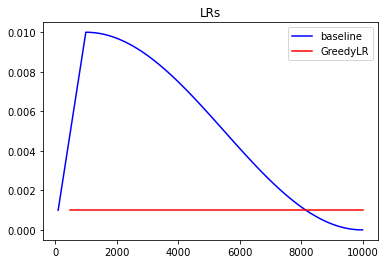

In [17]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')

Text(0.5, 1.0, 'Loss')

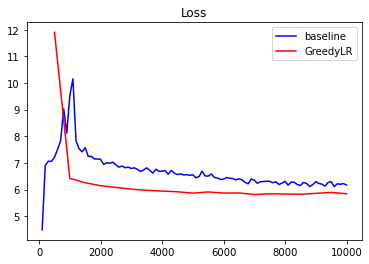

In [15]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-',label='baseline')
line2, = ax.plot(x2, y2, 'r-',label='GreedyLR')
plt.legend()
plt.title('Loss')

In [12]:
d1[-1][-1] - d2[-1][-1]

0.32810000000000006

In [ ]:
d2

## 2. Question Answering

In [ ]:
%pip install -r question_answering/requirements.txt
%pip install -e ~/transformers/ #Or wherever you downloaded this source 


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Obtaining file:///root/transformers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... \

In [2]:
from question_answering import run_qa as run_squad
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Default ADAMHF / Adafactor

In [4]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_qa.py
    --model_name_or_path xlm-roberta-base
    --version_2_with_negative
    --dataset_name adversarial_qa
    --dataset_config adversarialQA
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=10000
    --warmup_steps=1000
    --do_train
    --learning_rate=5e-3
    --per_device_train_batch_size=2
    --per_device_eval_batch_size=1
    --save_strategy no
    --logging_steps 100
    --lr_scheduler_type cosine_with_restarts
    --optim adafactor
""".split()

with patch.object(sys, "argv", testargs):
    run_squad.main()
    result = get_results(tmp_dir)

03/16/2023 18:46:28 - WARNING - question_answering.run_qa - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/16/2023 18:46:28 - INFO - question_answering.run_qa - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.99,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
fu

100%|██████████| 3/3 [00:00<00:00, 424.94it/s]
[INFO|configuration_utils.py:668] 2023-03-16 18:46:29,408 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
[INFO|configuration_utils.py:720] 2023-03-16 18:46:29,426 >> Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.0.dev0",
  "type_vocab_siz

03/16/2023 18:46:32 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/adversarial_qa/adversarialQA/1.0.0/92356be07b087c5c6a543138757828b8d61ca34de8a87807d40bbc0e6c68f04b/cache-5f2c62420c8bd2ee.arrow


[INFO|trainer.py:543] 2023-03-16 18:46:33,801 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1745] 2023-03-16 18:46:33,809 >> ***** Running training *****
[INFO|trainer.py:1746] 2023-03-16 18:46:33,810 >>   Num examples = 30833
[INFO|trainer.py:1747] 2023-03-16 18:46:33,810 >>   Num Epochs = 1
[INFO|trainer.py:1748] 2023-03-16 18:46:33,811 >>   Instantaneous batch size per device = 2
[INFO|trainer.py:1749] 2023-03-16 18:46:33,811 >>   Total train batch size (w. parallel, distributed & accumulation) = 2
[INFO|trainer.py:1750] 2023-03-16 18:46:33,812 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1751] 2023-03-16 18:46:33,812 >>   Total optimization steps = 10000
[INFO|trainer.py:1752] 2023-03-16 18:46:33,813 >>   Number of trainable parameters = 277454594


[2023-03-16 18:46:33.963: W smdistributed/modelparallel/torch/nn/predefined_hooks.py:78] Found unsupported HuggingFace version 4.27.0.dev0 for automated tensor parallelism. HuggingFace modules will not be automatically distributed. You can use smp.tp_register_with_module API to register desired modules for tensor parallelism, or directly instantiate an smp.nn.DistributedModule. Supported HuggingFace transformers versions for automated tensor parallelism: ['4.17.0', '4.20.1', '4.21.0']
[2023-03-16 18:46:33.991 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:23797 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-16 18:46:34.015 pytorch-1-13-gpu-py-ml-g5-16xlarge-bff23aa7fcca0c0ba1c19f2e4a3e:23797 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


Step,Training Loss
100,5.697300
200,5.992000
300,6.000800
400,5.991700
500,5.990800
600,6.027200
700,6.042500
800,6.066400
900,6.094500
1000,6.059100


[INFO|trainer.py:2019] 2023-03-16 19:08:09,510 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2821] 2023-03-16 19:08:09,519 >> Saving model checkpoint to /root/transformers/examples/pytorch/tmp2o0592r7
[INFO|configuration_utils.py:457] 2023-03-16 19:08:09,529 >> Configuration saved in /root/transformers/examples/pytorch/tmp2o0592r7/config.json
[INFO|modeling_utils.py:1762] 2023-03-16 19:08:21,101 >> Model weights saved in /root/transformers/examples/pytorch/tmp2o0592r7/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-16 19:08:21,112 >> tokenizer config file saved in /root/transformers/examples/pytorch/tmp2o0592r7/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-16 19:08:21,120 >> Special tokens file saved in /root/transformers/examples/pytorch/tmp2o0592r7/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-16 19:08:21,731 >> Dropping the following result as it does not have all the necess

***** train metrics *****
  epoch                    =       0.65
  total_flos               =  3650273GF
  train_loss               =     5.9803
  train_runtime            = 0:21:35.69
  train_samples            =      30833
  train_samples_per_second =     15.436
  train_steps_per_second   =      7.718


In [5]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

### Greedy LR

In [6]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_qa.py
    --model_name_or_path xlm-roberta-base
    --version_2_with_negative
    --dataset_name adversarial_qa
    --dataset_config adversarialQA
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=10000
    --warmup_steps=0
    --do_train
    --learning_rate=5e-3
    --per_device_train_batch_size=4
    --per_device_eval_batch_size=2
    --lr_scheduler_type greedy
    --save_strategy no
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.9
    --optim adafactor
""".split()

with patch.object(sys, "argv", testargs):
    run_squad.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1509] 2023-03-16 19:08:22,234 >> PyTorch: setting up devices
[INFO|training_args.py:1289] 2023-03-16 19:08:22,235 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/16/2023 19:08:22 - WARNING - question_answering.run_qa - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/16/2023 19:08:22 - INFO - question_answering.run_qa - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.9,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
ful

100%|██████████| 3/3 [00:00<00:00, 503.86it/s]
[INFO|configuration_utils.py:668] 2023-03-16 19:08:22,709 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
[INFO|configuration_utils.py:720] 2023-03-16 19:08:22,711 >> Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.0.dev0",
  "type_vocab_siz

03/16/2023 19:08:25 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/adversarial_qa/adversarialQA/1.0.0/92356be07b087c5c6a543138757828b8d61ca34de8a87807d40bbc0e6c68f04b/cache-5f2c62420c8bd2ee.arrow


[INFO|trainer.py:543] 2023-03-16 19:08:25,823 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1745] 2023-03-16 19:08:25,833 >> ***** Running training *****
[INFO|trainer.py:1746] 2023-03-16 19:08:25,834 >>   Num examples = 30833
[INFO|trainer.py:1747] 2023-03-16 19:08:25,835 >>   Num Epochs = 2
[INFO|trainer.py:1748] 2023-03-16 19:08:25,835 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1749] 2023-03-16 19:08:25,836 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1750] 2023-03-16 19:08:25,836 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1751] 2023-03-16 19:08:25,836 >>   Total optimization steps = 10000
[INFO|trainer.py:1752] 2023-03-16 19:08:25,837 >>   Number of trainable parameters = 277454594


GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.9


Step,Training Loss
10,6.047200
20,5.991300
30,6.079800
40,5.995500
50,6.012200
60,6.008900
70,6.005700
80,5.985800
90,6.013400
100,5.982700


[INFO|trainer.py:2019] 2023-03-16 19:35:48,381 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2821] 2023-03-16 19:35:48,391 >> Saving model checkpoint to /root/transformers/examples/pytorch/tmpdpkpzar3
[INFO|configuration_utils.py:457] 2023-03-16 19:35:48,402 >> Configuration saved in /root/transformers/examples/pytorch/tmpdpkpzar3/config.json
[INFO|modeling_utils.py:1762] 2023-03-16 19:36:00,212 >> Model weights saved in /root/transformers/examples/pytorch/tmpdpkpzar3/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-16 19:36:00,222 >> tokenizer config file saved in /root/transformers/examples/pytorch/tmpdpkpzar3/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-16 19:36:00,230 >> Special tokens file saved in /root/transformers/examples/pytorch/tmpdpkpzar3/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-16 19:36:00,867 >> Dropping the following result as it does not have all the necess

***** train metrics *****
  epoch                    =        1.3
  total_flos               =  7299999GF
  train_loss               =     5.9841
  train_runtime            = 0:27:22.54
  train_samples            =      30833
  train_samples_per_second =     24.352
  train_steps_per_second   =      6.088


In [7]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

Text(0.5, 1.0, 'LRs')

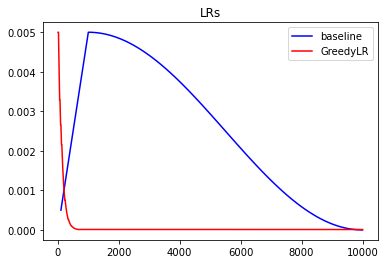

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')

Text(0.5, 1.0, 'Loss')

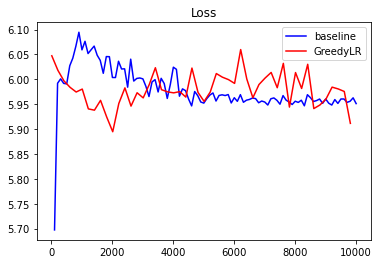

In [24]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0][::20]
y2 = np.array(d2)[:,2][::20]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')

In [10]:
d1[-1][-1] - d2[-1][-1]

-0.013399999999999856